In [100]:
%matplotlib inline
from pandas import DataFrame
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt 

In [101]:
def plot_graph(X, y, centroids=None):
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue', 2:'green'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    if centroids is None:
        centroid_0 = X[y == 0].mean(0)
        centroid_1 = X[y == 1].mean(0)
        centroid_2 = X[y == 2].mean(0)
    else:
        centroid_0 = centroids[0]
        centroid_1 = centroids[1]
        centroid_2 = centroids[2]

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], alpha=0.4)

    ax.plot(centroid_0[0], centroid_0[1], '+k',  markersize=20, markeredgewidth=3)
    ax.plot(centroid_1[0], centroid_1[1], '+k',  markersize=20, markeredgewidth=3)
    ax.plot(centroid_2[0], centroid_2[1], '+k',  markersize=20, markeredgewidth=3)
        
    plt.show()

In [144]:
def plot_graphs(X, labels, centroids):

    fig, axs = plt.subplots(1, 6)
    fig.set_size_inches(35, 5)
    colors = {0:'red', 1:'blue', 2:'green'}

    gt_centroid_0 = X[y == 0].mean(0)
    gt_centroid_1 = X[y == 1].mean(0)
    gt_centroid_2 = X[y == 2].mean(0)

    # scatter plot, dots colored by class value
    for i, label in enumerate(labels):
        df = DataFrame(dict(x=X[:,0], y=X[:,1], label=label))
        grouped = df.groupby('label')

        centroid_0 = centroids[i][0]
        centroid_1 = centroids[i][1]
        centroid_2 = centroids[i][2]

        for key, group in grouped:
            group.plot(ax=axs[i], kind='scatter', x='x', y='y', label=key, color=colors[key], alpha=0.4)

        axs[i].plot(gt_centroid_0[0], gt_centroid_0[1], 'ok',  markersize=10, markeredgewidth=3, alpha=0.4)
        axs[i].plot(gt_centroid_1[0], gt_centroid_1[1], 'ok',  markersize=10, markeredgewidth=3, alpha=0.4)
        axs[i].plot(gt_centroid_2[0], gt_centroid_2[1], 'ok',  markersize=10, markeredgewidth=3, alpha=0.4)

        axs[i].plot(centroid_0[0], centroid_0[1], '+k',  markersize=20, markeredgewidth=3)
        axs[i].plot(centroid_1[0], centroid_1[1], '+k',  markersize=20, markeredgewidth=3)
        axs[i].plot(centroid_2[0], centroid_2[1], '+k',  markersize=20, markeredgewidth=3)
        
        axs[i].set(xlabel='x', ylabel='')
    plt.show()

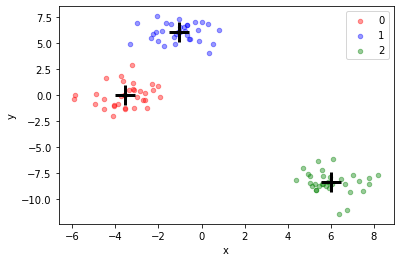

In [120]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)

plot_graph(X,y)

In [163]:
random_cluster = True

if random_cluster:
    rand_x = np.random.uniform(low=X[:,0].min(), high=X[:,0].max(), size=(3,1))
    rand_y = np.random.uniform(low=X[:,1].min(), high=X[:,1].max(), size=(3,1))
    init_cluster = np.concatenate([rand_x, rand_y], axis=1)
else:
    init_cluster = np.zeros([3,2])

saved_kmeans_labes = []
saved_kmeans_clusters = []

saved_kmeans_labes.append(np.zeros(100).astype(int))
saved_kmeans_clusters.append(init_cluster)

for i in range(5):
    if i == 0:
        kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1, init=init_cluster).fit(X)
    else:
        kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1, init=kmeans.cluster_centers_).fit(X)
    saved_kmeans_labes.append(kmeans.labels_)
    saved_kmeans_clusters.append(kmeans.cluster_centers_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


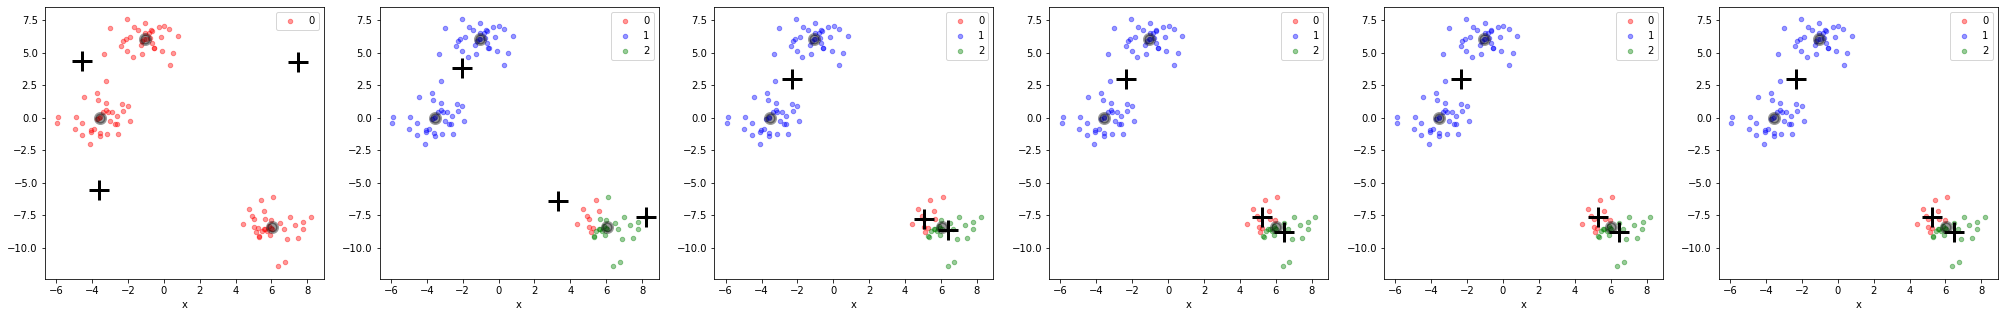

In [162]:
plot_graphs(X, saved_kmeans_labes, saved_kmeans_clusters)

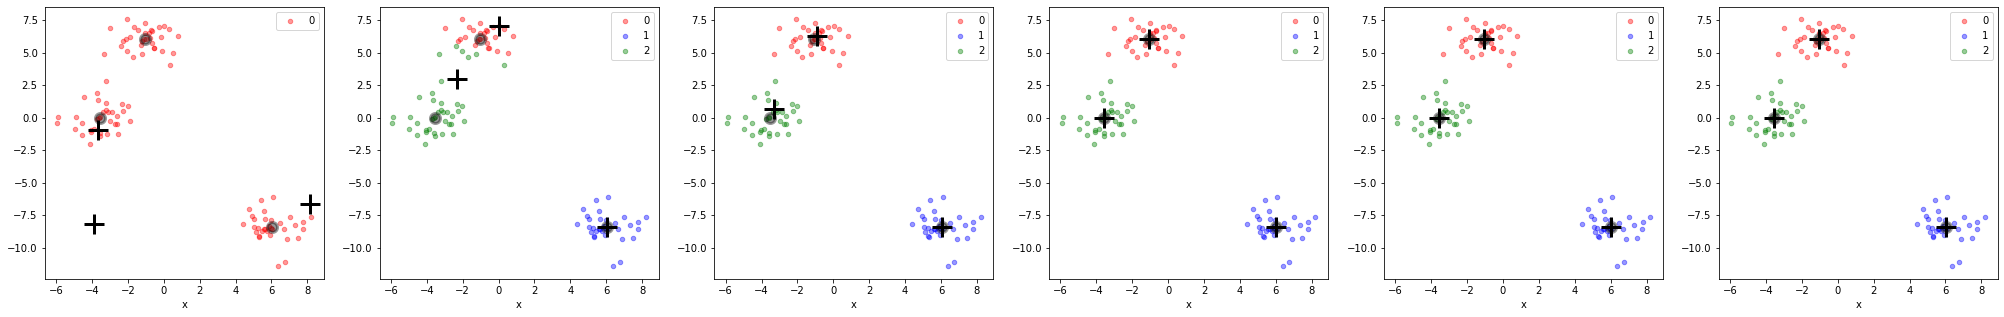

In [164]:
plot_graphs(X, saved_kmeans_labes, saved_kmeans_clusters)